In [1]:
import numpy as np
import pandas as pd

import Functions_Kit as erk
    
%load_ext autoreload
%autoreload 2
ind_rets = erk.get_ind_returns_Euro(weighting="1")
ind_mcap1 = pd.read_excel('Eurostoxx_50_2.xlsx', index_col=0, parse_dates=True)
ind_mcap = erk.get_ind_market_caps(ind_mcap1, weights=True)
inds=ind_rets.columns
rets = ind_rets[inds]
cov = rets.cov()

ind_mcap_gmvopt=(ind_mcap.iloc[3000])
enc=1/(((ind_mcap_gmvopt)**2).sum())
enc=int(enc)
ind_mcap_gmvopt=ind_mcap_gmvopt.sort_values(ascending=False)
ind_mcap_gmvopt=ind_mcap_gmvopt.iloc[0:enc]
inds=ind_mcap_gmvopt.index
ind_rets_gmvopt = ind_rets[inds]
cov_gmvopt = ind_rets_gmvopt.cov()




,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.057947,0.213973,0.190652,10.358802,0.019113,0.031708,0.270815,-0.564918
CW,0.029977,0.219206,0.281552,11.584613,0.018980,0.032433,0.136752,-0.563371
gmv,0.088390,0.160862,-0.057731,7.440156,0.015536,0.023184,0.549476,-0.379082
Shrinkage_gmv,0.083151,0.161447,0.016186,7.955611,0.015294,0.023081,0.515037,-0.375708
Optimized_gmv,0.082896,0.165625,-0.024511,7.639379,0.015884,0.024056,0.500502,-0.377897


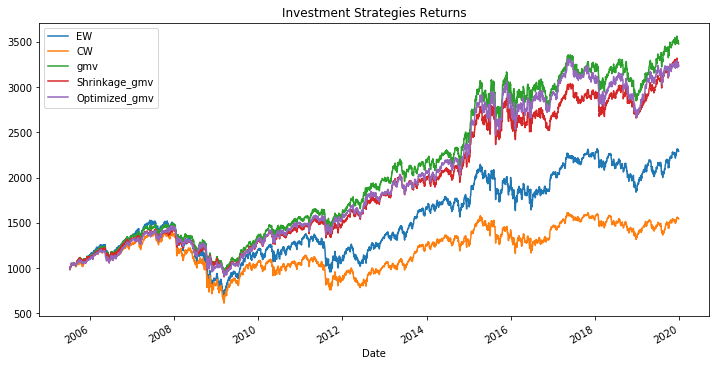

In [8]:
#BackTesting Performance
#Equally Weighted
ewr = erk.backtest_ws(ind_rets,  weighting=erk.weight_ew)
#Cap Weighted
cwr = erk.backtest_ws(ind_rets, weighting=erk.weight_cw, cap_weights=ind_mcap)
#GMV with Sample Covariance
gmv = erk.backtest_ws(ind_rets, weighting=erk.weight_gmv, cov_estimator=erk.sample_cov)
#GMV Shrinkage Covariance matrix
gmv_shrinkage = erk.backtest_ws(ind_rets, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.25)
#GMV Optimized
gmv_optimized = erk.backtest_ws(ind_rets_gmvopt, weighting=erk.weight_gmv, cov_estimator=erk.sample_cov)

#Risk Parity
mv_erc_r = erk.backtest_ws(ind_rets,  weighting=erk.weight_erc, cov_estimator=erk.sample_cov)
#Max Diversification
max_div = erk.backtest_ws(ind_rets, weighting=erk.weight_maxdiv, cov_estimator=erk.sample_cov)



#Results of BackTesting
backtest_results = pd.DataFrame({"EW": ewr,"CW": cwr,"gmv": gmv,"Shrinkage_gmv": gmv_shrinkage,"Optimized_gmv":gmv_optimized})
#Graphical Representation of Historical Performance of the Strategies.
(((1+backtest_results).cumprod())*1000).plot(figsize=(12,6), title="Investment Strategies Returns")
erk.summary_stats(backtest_results.dropna())


In [9]:
#Tracking Error
tracking_error_cwr=erk.tracking_error(gmv_optimized,cwr)
tracking_error_ewr=erk.tracking_error(gmv_optimized,ewr)
tracking_error_cwr,tracking_error_ewr


(0.45342900687281334, 0.4272008476476302)

In [10]:
#Information Ratio
df=erk.summary_stats(backtest_results.dropna())
ret_opt_ew=df['Annualized Return'][0]
ret_cw=df['Annualized Return'][1]
ret_gmv=df['Annualized Return'][2]
ret_shr_gmv=df['Annualized Return'][3]
ret_opt_gmv=df['Annualized Return'][4]

#information ratio of optimized gmv vs equallyweighted
inf_optgmv_vs_ew=(ret_opt_gmv-ret_opt_ew)/tracking_error_ewr
inf_optgmv_vs_ew

#information ratio of optimized gmv vs capweighted
inf_optgmv_vs_cw=(ret_opt_gmv-ret_cw)/tracking_error_cwr
inf_optgmv_vs_cw

inf_optgmv_vs_ew,inf_optgmv_vs_cw


(0.058400051133817486, 0.1167082562159162)